In [17]:
import json

In [18]:
def get_experiment_dict(experiment):
    report_path = 'classification_report.txt'
    experiment_dict = json.load(open(experiment + report_path))
    del experiment_dict['macro avg']
    del experiment_dict['weighted avg']
    del experiment_dict['accuracy']
    return experiment_dict

baseline = get_experiment_dict('saves/baseline/')
autoencoder = get_experiment_dict('path_autoencoder/saves/path_autoencoded/')
pioneer = get_experiment_dict('pioneer/saves/pioneer_lstm/')

In [19]:
# calculate mean f1-scores for for all classes with at least n samples
def mean_f1(experiment_dict, n=0):
    f1s = []
    for k, v in experiment_dict.items():
        v_p = v['precision']
        v_r = v['recall']
        v_f1 = v['f1-score']
        v_s = v['support']
        if v_s >= n:
            f1s.append(v_f1)
    return sum(f1s) / len(f1s)

def mean_f1_support_weighted(experiment_dict):
    f1s = []
    supports = []
    for k, v in experiment_dict.items():
        v_p = v['precision']
        v_r = v['recall']
        v_f1 = v['f1-score']
        v_s = v['support']
        f1s.append(v_f1 * v_s)
        supports.append(v_s)
    return sum(f1s) / sum(supports)

def count_classes_with_n_samples(experiment_dict, n=0):
    count = 0
    for k, v in experiment_dict.items():
        v_s = v['support']
        if v_s >= n:
            count += 1
    return count

In [20]:
for n in (0, 10, 100, 1000):
    print(f'mean f1 for classes with at least {n:5} samples: {mean_f1(baseline, n):.3f}  ({count_classes_with_n_samples(baseline, n):3}) classes')

print()
for n in (0, 10, 100, 1000):
    print(f'mean f1 for classes with at least {n:5} samples: {mean_f1(autoencoder, n):.3f}  ({count_classes_with_n_samples(autoencoder, n):3}) classes')

print()
for n in (0, 10, 100, 1000):
    print(f'mean f1 for classes with at least {n:5} samples: {mean_f1(pioneer, n):.3f}  ({count_classes_with_n_samples(pioneer, n):3}) classes')

mean f1 for classes with at least     0 samples: 0.669  ( 67) classes
mean f1 for classes with at least    10 samples: 0.747  ( 47) classes
mean f1 for classes with at least   100 samples: 0.815  ( 30) classes
mean f1 for classes with at least  1000 samples: 0.891  ( 11) classes

mean f1 for classes with at least     0 samples: 0.801  ( 67) classes
mean f1 for classes with at least    10 samples: 0.889  ( 47) classes
mean f1 for classes with at least   100 samples: 0.926  ( 30) classes
mean f1 for classes with at least  1000 samples: 0.991  ( 11) classes

mean f1 for classes with at least     0 samples: 0.825  ( 67) classes
mean f1 for classes with at least    10 samples: 0.905  ( 47) classes
mean f1 for classes with at least   100 samples: 0.926  ( 30) classes
mean f1 for classes with at least  1000 samples: 0.987  ( 11) classes


In [29]:
# use matplotlib to plot the f1-scores vs the number of samples
import matplotlib.pyplot as plt
import numpy as np

def plot_f1_vs_support(experiment_dict):
    f1s = []
    supports = []
    for k, v in experiment_dict.items():
        v_p = v['precision']
        v_r = v['recall']
        v_f1 = v['f1-score']
        v_s = v['support']
        f1s.append(v_f1)
        supports.append(v_s)

    plt.scatter(supports, f1s)
    plt.xscale('log')
    plt.xlabel('number of samples')
    plt.ylabel('f1-score')
    plt.show()

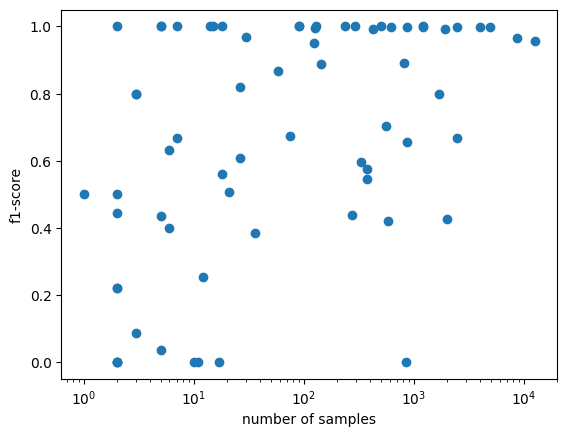

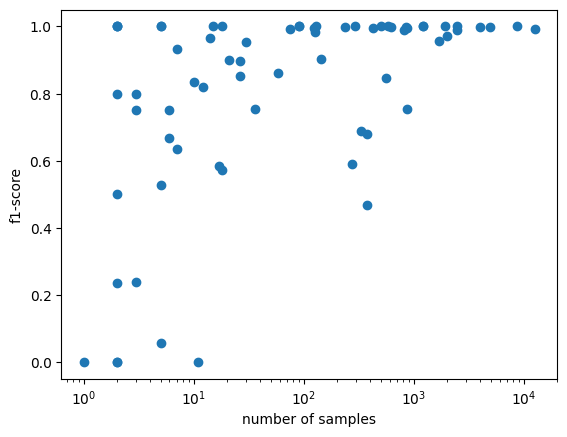

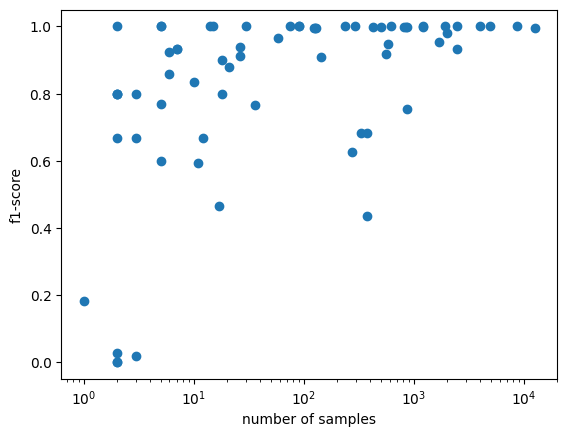

In [22]:
plot_f1_vs_support(baseline)
plot_f1_vs_support(autoencoder)
plot_f1_vs_support(pioneer)

In [52]:
# find classes in pioneer with support > 100 with f1-score < 0.8
def find_bad(experiment, samples=100, f1=0.9):
    for k, v in experiment.items():
        v_f1 = v['f1-score']
        v_s = v['support']
        if v_s > samples and v_f1 < f1:
            print(f'{k:40} f1-score: {v_f1:.3f}  support: {v_s:4}')

print('bad classes in baseline:')
find_bad(baseline)

print('bad classes in pioneer:')
find_bad(pioneer)

print('bad classes in autoencoder:')
find_bad(autoencoder)

bad classes in baseline:
alpine                                   f1-score: 0.703  support: 560.0
anvil                                    f1-score: 0.545  support: 378.0
cleanup                                  f1-score: 0.438  support: 276.0
imapd                                    f1-score: 0.668  support: 2469.0
local                                    f1-score: 0.655  support: 868.0
master                                   f1-score: 0.422  support: 580.0
pickup                                   f1-score: 0.887  support: 143.0
pkg                                      f1-score: 0.800  support: 1701.0
proxymap                                 f1-score: 0.595  support: 331.0
python2.7                                f1-score: 0.000  support: 841.0
sh                                       f1-score: 0.428  support: 1987.0
smtpd                                    f1-score: 0.890  support: 818.0
trivial-rewrite                          f1-score: 0.574  support: 377.0
bad classes in pioneer:

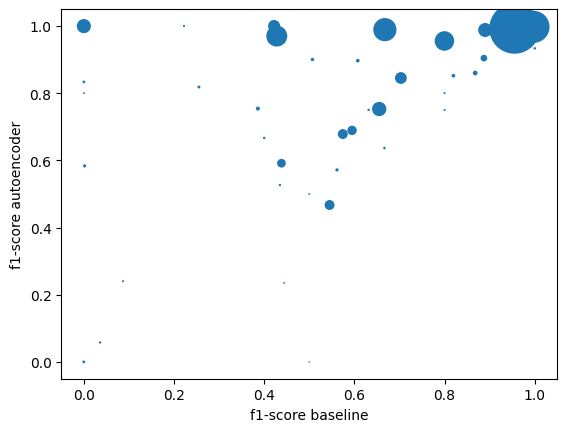

In [26]:
# take two dicts, make a scatter plot visualizing the difference in f1-scores by plotting both scores and different colours
def plot_f1_diff(experiment_dict1, experiment_dict2):
    f1s1 = []
    f1s2 = []
    supports = []
    for k, v in experiment_dict1.items():
        v_p = v['precision']
        v_r = v['recall']
        v_f1 = v['f1-score']
        v_s = v['support']
        if k in experiment_dict2:
            f1s1.append(v_f1)
            f1s2.append(experiment_dict2[k]['f1-score'])
            supports.append(v_s)

    plt.scatter(f1s1, f1s2, s=np.array(supports) / 10)
    plt.xlabel('f1-score baseline')
    plt.ylabel('f1-score autoencoder')
    plt.show()

plot_f1_diff(baseline, autoencoder)

In [45]:
def plot_f1_vs_support_diff(experiment_1_dict, experiment_2_dict):
    f1s_1 = []
    supports_1 = []
    for k, v in experiment_1_dict.items():
        v_p = v['precision']
        v_r = v['recall']
        v_f1 = v['f1-score']
        v_s = v['support']
        f1s_1.append(v_f1)
        supports_1.append(v_s)
    f1s_2 = []
    supports_2 = []
    for k, v in experiment_2_dict.items():
        v_p = v['precision']
        v_r = v['recall']
        v_f1 = v['f1-score']
        v_s = v['support']
        f1s_2.append(v_f1)
        supports_2.append(v_s)

    plt.scatter(supports_1, f1s_1, c='blue')
    plt.scatter(supports_2, f1s_2, c='red')
    for i in range(len(supports_1)):
        if f1s_1[i] < f1s_2[i]:
            plt.plot([supports_1[i], supports_2[i]], [f1s_1[i], f1s_2[i]], c='green')
        else:
            plt.plot([supports_1[i], supports_2[i]], [f1s_1[i], f1s_2[i]], c='red')
    plt.xscale('log')
    plt.xlabel('number of samples')
    plt.ylabel('f1-score')
    plt.show()

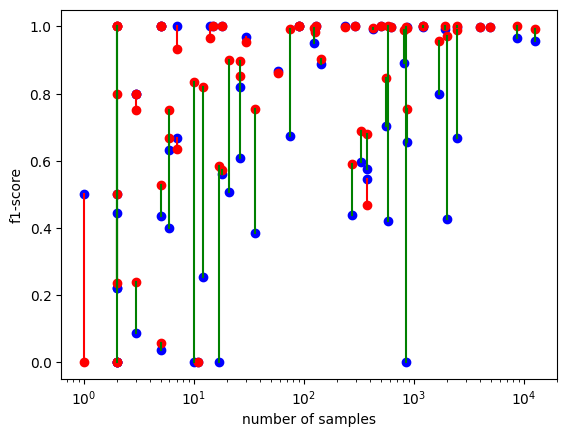

In [49]:
plot_f1_vs_support_diff(baseline, autoencoder)